In [3]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [4]:
iris=load_iris()
x=iris.data
y=iris.target

High variance

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=4)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

0.973684210526


In [9]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=3)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

0.947368421053


In [10]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=2)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

1.0


cross_validation recommendations:
    1. K can be any number, but k=10 is recommended
    2. stratified sampling is recommended for creating the folds:
        each response class should be represented with equal proportions in each of the K folds
        scikit-learn's cross_val_score function does this by default



In [13]:
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn, x, y, cv=10, scoring="accuracy")
print (scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [14]:
print (scores.mean())

0.966666666667


In [15]:
k_range=range(1, 31)
k_scores=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn, x, y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
print (k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


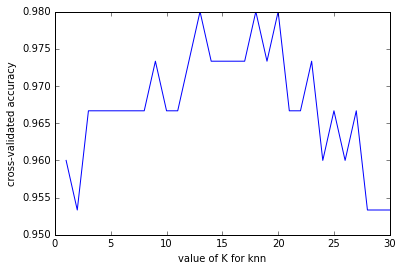

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel("value of K for knn")
plt.ylabel("cross-validated accuracy")

In [18]:
#compare the best KNN model with logistic regression on the iris dataset
knn=KNeighborsClassifier(n_neighbors=20)
print (cross_val_score(knn, x, y, cv=10, scoring="accuracy").mean())

0.98


In [19]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
print (cross_val_score(logreg, x, y, cv=10, scoring="accuracy").mean())

0.953333333333


In [20]:
#select whether the newspaper feature should be included in the linear regression model on the advertising sales
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


In [21]:
data=pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", index_col=0)


In [22]:
feature_cols=["TV", "Radio", "Newspaper"]
x=data[feature_cols]
y=data.Sales


In [23]:
lm=LinearRegression()
scores=cross_val_score(lm, x, y, cv=10, scoring="mean_squared_error")
print (scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [24]:
#need to find the lowest mean squared error, so fix the minus sign
mse_scores=-scores
print (mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [25]:
rmse_scores=np.sqrt(mse_scores)
print (rmse_scores)

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [26]:
print (rmse_scores.mean())

1.69135317081


In [29]:
feature_cols=["TV", "Radio"]
x=data[feature_cols]
print (np.sqrt(-cross_val_score(lm, x, y, cv=10, scoring="mean_squared_error")).mean())

1.67967484191


In [30]:
#so we should include newspaper

###Improvement to cross-validation###
####repeated cross-validation####
*repeat cross-validation multiples times (with different random splits of the data) and average the results
*More reliable estimate of out-of-sample performance by reducing the variance associated with a single trail of cross-validation
####Creating a hold-out set####
*"HOld out" a portion of the data before beginning the model building process
*locate the best model using cross-validation on the remaining data, and test it using the hold-out set
Feature enginnering and selection within cross-validation iterations
*normally, feature engineering and selection occurs before cross-validation
*instead, perform all feature engineering and selection within each cross-validation iteration